<a href="https://colab.research.google.com/github/L0ureiro/Pedidos-e-Respostas-LAI/blob/main/DeepLearn%2BMlops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link Canvas: https://docs.google.com/document/d/184aWSNe6fq9TTrROpueIro6m2pnQyFddX-cQifP-I5k/edit?tab=t.0#heading=h.3ktfmkup4get

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# !pip install transformers torch datasets

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')


In [4]:
# # Carregar o dataset
# file_path = '/content/drive/MyDrive/DeepLearnin+Mlops/Cópia de pedidos.parquet'  # Atualize o caminho
file_path = 'Cópia de pedidos.parquet'
df = pd.read_parquet(file_path)

In [5]:
df.head()

,index,IdPedido,ProtocoloPedido,Esfera,OrgaoDestinatario,Situacao,DataRegistro,ResumoSolicitacao,DetalhamentoSolicitacao,PrazoAtendimento,...,FormaResposta,OrigemSolicitacao,IdSolicitante,AssuntoPedido,SubAssuntoPedido,Tag,DataResposta,Resposta,Decisao,EspecificacaoDecisao
0,0,5194471,137000003202301,Federal,SGPR – Secretaria-Geral da Presidência da Repú...,Concluída,01/01/2023,Gastos Publicos,Solicito informar o valor gasto com a festa da...,08/02/2023,...,Pelo sistema (com avisos por email),Internet,0,Acesso à informação,,,19/01/2023,"Prezado(a) cidadão(ã), Em atenção ao pedido d...",Acesso Concedido,Resposta solicitada inserida no Fala.Br
1,1,5194479,10001000001202301,Federal,BACEN – Banco Central do Brasil,Concluída,01/01/2023,se tem saldo,gostaria de saber se tenho saldo a receber.,25/01/2023,...,Pelo sistema (com avisos por email),Internet,0,Acesso à informação,,,06/01/2023,"Prezado(a) senhor(a), Esclarecemos que o Ba...",Acesso Concedido,Orientação sobre como encontrar a informação s...
2,2,5194498,59014000001202342,Federal,DNOCS – Departamento Nacional de Obras Contra ...,Concluída,01/01/2023,Acesso à Água,Prezados Em relação ao Programa Cisternas q...,23/01/2023,...,Pelo sistema (com avisos por email),Internet,0,Água,,,03/01/2023,"Prezado Senhor, Cumprimentando-o cordialmen...",Acesso Concedido,Resposta solicitada inserida no Fala.Br
3,3,5194501,112000001202391,Federal,SGPR – Secretaria-Geral da Presidência da Repú...,Concluída,01/01/2023,Kjj,O que que funciona dentro do palacio do planalto,25/01/2023,...,Pelo sistema (com avisos por email),Internet,0,Acesso à informação,,,04/01/2023,"Prezado(a) Cidadão(ã), Em atenção ao pedido...",Acesso Concedido,Orientação sobre como encontrar a informação s...
4,4,5194509,23546000003202386,Federal,MEC – Ministério da Educação,Concluída,01/01/2023,Programa Nacional das Escolas Cívico-Militares,"Gostaria de solicitar, sobre o Programa Nacion...",23/01/2023,...,Pelo sistema (com avisos por email),Internet,5504522,Educação Básica,Programa Nacional das Escolas Cívico-Militares...,Secretaria de Educação Básica - SEB,17/01/2023,"Senhor Usuário, Em resposta a seu pedido...",Acesso Concedido,Resposta solicitada inserida no Fala.Br


-- CAMPOS: PEDIDOS
------------------------------
- IdPedido - inteiro: identificador único do pedido (não mostrado no sistema);
- ProtocoloPedido - texto(17): número do protocolo do pedido;
- Esfera - texto(30): esfera do órgão destinatário do pedido;
- OrgaoDestinatario  - texto(250): nome do órgão destinatário do pedido;
- Situacao - texto(200): descrição da situação do pedido;
- DataRegistro - Data DD/MM/AAAA : data de abertura do pedido;
- ResumoSolicitacao - texto(255): resumo do pedido;
- DetalhamentoSolicitacao - texto(2048): detalhamento do pedido;
- PrazoAtendimento - Data DD/MM/AAAA : data limite para atendimento ao pedido;
- FoiProrrogado - texto(3) "Sim" ou "Não" : informa se houve prorrogação do prazo do pedido;
- FoiReencaminhado - texto(3) "Sim" ou "Não": informa se o pedido foi reencaminhado;
- FormaResposta - texto(200): tipo de resposta escolhida pelo solicitante na abertura do pedido;
- OrigemSolicitacao - texto(50): informa se o pedido foi aberto em um Balcão SIC ou pela Internet;
- IdSolicitante - inteiro: identificador único do solicitante (não mostrado no sistema);
- AssuntoPedido - texto(200) : assunto do pedido atribuído pel SIC;
- SubAssuntoPedido - texto(200) : subassunto do pedido atribuída pelo SIC;
- Tag - texto(1024): as tags são marcadores no pedido para realizar classificações que não estão em assuntos/ subassuntos;
- DataResposta - Data DD/MM/AAAA : data da resposta ao pedido (campo em branco para pedidos que ainda estejam na situação "Em Tramitação");
- Resposta - texto(8000): resposta ao pedido;
- Decisao - texto(100) : tipo resposta dada ao pedido (campo em branco para pedidos que ainda estejam na situação "Em Tramitação");
- EspecificacaoDecisao - texto(200): subtipo da resposta dada ao pedido (campo em branco para pedidos que ainda estejam na situação "Em Tramitação");

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350368 entries, 0 to 350367
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   index                    350368 non-null  int64 
 1   IdPedido                 350368 non-null  int64 
 2   ProtocoloPedido          350368 non-null  int64 
 3   Esfera                   350368 non-null  object
 4   OrgaoDestinatario        350368 non-null  object
 5   Situacao                 350368 non-null  object
 6   DataRegistro             350368 non-null  object
 7   ResumoSolicitacao        335732 non-null  object
 8   DetalhamentoSolicitacao  350368 non-null  object
 9   PrazoAtendimento         350368 non-null  object
 10  FoiProrrogado            350368 non-null  object
 11  FoiReencaminhado         350368 non-null  object
 12  FormaResposta            350368 non-null  object
 13  OrigemSolicitacao        350368 non-null  object
 14  IdSolicitante       

In [7]:
import wandb

# Inicializar o projeto no WandB
wandb.init(project="Pedidos_Respostas_LLM", name="save_original_dataset")

# Salvar o arquivo .parquet como artefato
artifact = wandb.Artifact("dataset_original", type="dataset")
artifact.add_file('Cópia de pedidos.parquet')  # Certifique-se de passar o caminho correto
wandb.log_artifact(artifact)

# Finalizar o logging no WandB
wandb.finish()


wandb: Currently logged in as: loureirolucas98 (loureirolucas98-ufrn). Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [8]:
# Distribuição de valores em 'Decisao'
print(df['Decisao'].value_counts())

Decisao
Acesso Concedido                                            243106
Não se trata de solicitação de informação                    34933
Acesso Negado                                                23739
Acesso Parcialmente Concedido                                18983
Informação Inexistente                                       12880
Órgão não tem competência para responder sobre o assunto      9066
Pergunta Duplicada/Repetida                                   7661
Name: count, dtype: int64


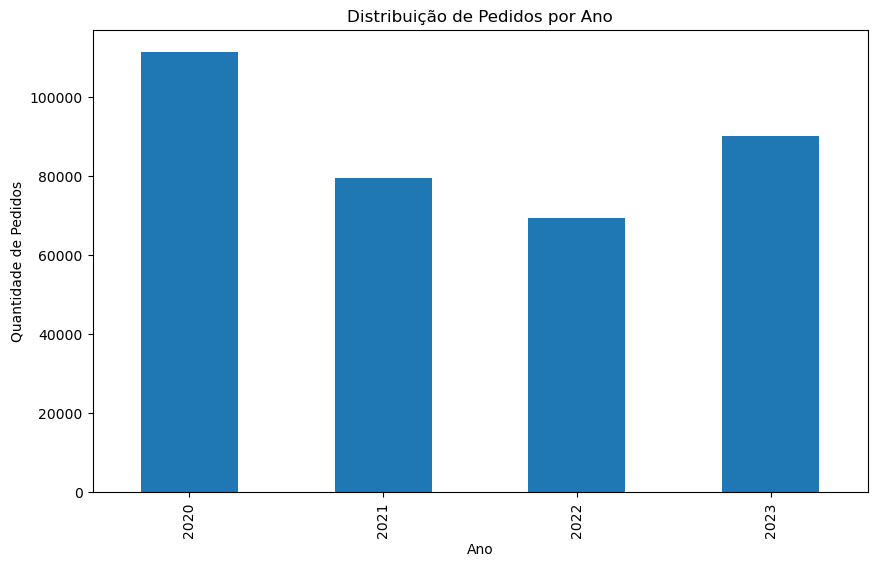

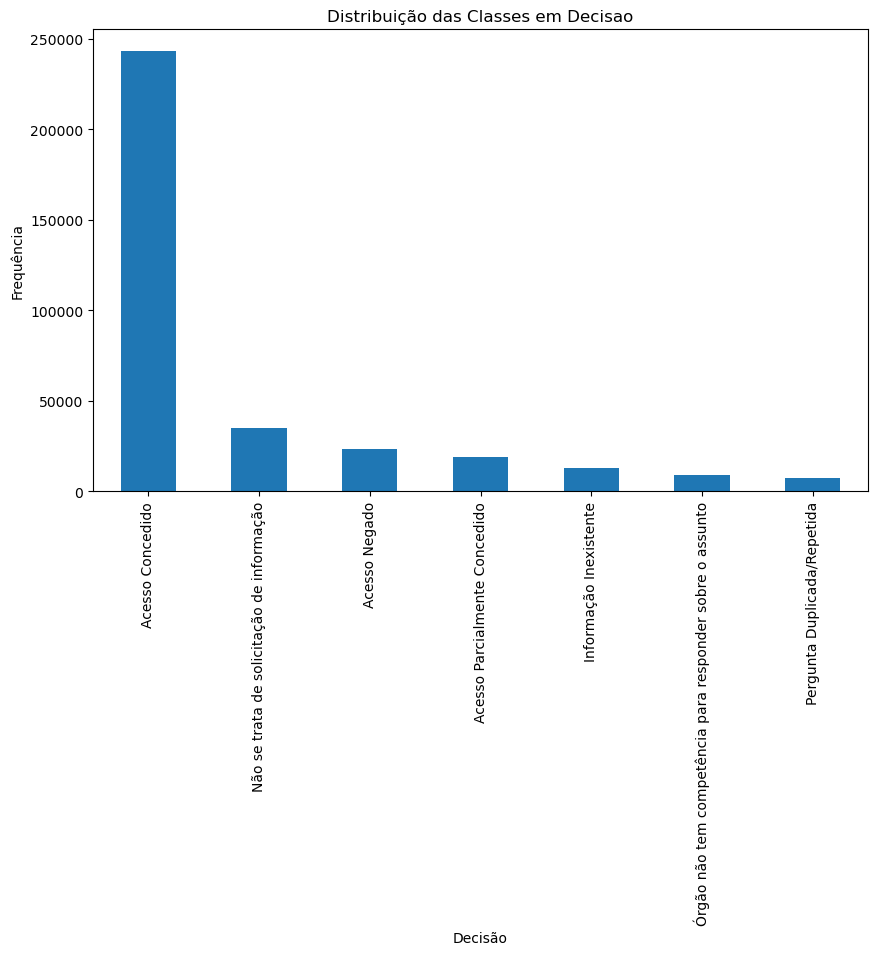

In [9]:
# Converter datas
df['DataRegistro'] = pd.to_datetime(df['DataRegistro'], format='%d/%m/%Y')

# Distribuição por ano
df['AnoRegistro'] = df['DataRegistro'].dt.year
df['AnoRegistro'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Pedidos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Pedidos')
plt.show()

# Distribuição das classes em 'Decisao'
df['Decisao'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição das Classes em Decisao')
plt.xlabel('Decisão')
plt.ylabel('Frequência')
plt.show()

In [10]:
# Remover entradas sem ResumoSolicitacao
df = df[~df['ResumoSolicitacao'].isnull()]
print(f"Quantidade de registros após remoção: {len(df)}")

Quantidade de registros após remoção: 335732


In [11]:
# Manter apenas as colunas relevantes
df_classifier = df[['ResumoSolicitacao', 'DetalhamentoSolicitacao', 'Decisao']].copy()
df_classifier.head()

,ResumoSolicitacao,DetalhamentoSolicitacao,Decisao
0,Gastos Publicos,Solicito informar o valor gasto com a festa da...,Acesso Concedido
1,se tem saldo,gostaria de saber se tenho saldo a receber.,Acesso Concedido
2,Acesso à Água,Prezados Em relação ao Programa Cisternas q...,Acesso Concedido
3,Kjj,O que que funciona dentro do palacio do planalto,Acesso Concedido
4,Programa Nacional das Escolas Cívico-Militares,"Gostaria de solicitar, sobre o Programa Nacion...",Acesso Concedido


In [12]:
# Concatenar as colunas textuais
df_classifier['texto_completo'] = df_classifier['ResumoSolicitacao'] + " " + df_classifier['DetalhamentoSolicitacao']

# Remover as colunas originais, se não forem mais necessárias
df_classifier = df_classifier[['texto_completo', 'Decisao']]

In [13]:
df_classifier

,texto_completo,Decisao
0,Gastos Publicos Solicito informar o valor gast...,Acesso Concedido
1,se tem saldo gostaria de saber se tenho saldo ...,Acesso Concedido
2,Acesso à Água Prezados Em relação ao Progra...,Acesso Concedido
3,Kjj O que que funciona dentro do palacio do pl...,Acesso Concedido
4,Programa Nacional das Escolas Cívico-Militares...,Acesso Concedido
...,...,...
350362,"Produção de medicamentos Boa noite, tenho uma ...",Não se trata de solicitação de informação
350363,Dúvida a respeito da quantidade de bolsas. No ...,Informação Inexistente
350364,Prorrogação de auxílio doenca Fiz um pedido de...,Acesso Concedido
350365,Óbitos Número de óbitos registrados por ano no...,Acesso Concedido


In [14]:
import re
import unicodedata

def preprocess_text(text: str) -> str:
    """
    Realiza o pré-processamento básico no texto.

    1. Remove caracteres não alfabéticos repetidos.
    2. Remove múltiplos espaços.
    3. (Opcional) Remove acentos.

    Args:
        text (str): O texto original.

    Returns:
        str: O texto pré-processado.
    """
    # Remover caracteres não alfabéticos repetidos (ex.: "!!!" → "!")
    text = re.sub(r'(\W)\1+', r'\1', text).strip()

    # Remover múltiplos espaços
    text = re.sub(r'\s+', ' ', text).strip()

    # Opcional: Normalizar para ASCII (remover acentos)
    # text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode()

    return text


In [15]:
df_classifier['texto_completo'] = df_classifier['texto_completo'].apply(preprocess_text)

## Map dos valores da coluna decisão para torna-la binaria

In [16]:
# Nome da coluna que queremos transformar
coluna_decisao = 'Decisao'

# Definir o mapeamento de categorias
mapeamento_binario = {
    'Acesso Concedido': 1,
    'Acesso Parcialmente Concedido': 1,
    'Órgão não tem competência para responder sobre o assunto': 0,
    'Pergunta Duplicada/Repetida': 0,
    'Informação Inexistente': 0,
    'Acesso Negado': 0,
    'Não se trata de solicitação de informação': 0
}

# Aplicar o mapeamento à coluna
df_classifier[coluna_decisao] = df_classifier[coluna_decisao].map(mapeamento_binario)

# Verificar os valores únicos após o mapeamento
print("\nValores únicos na coluna 'Decisao' após mapeamento:")
print(df_classifier[coluna_decisao].unique())


Valores únicos na coluna 'Decisao' após mapeamento:
[1 0]


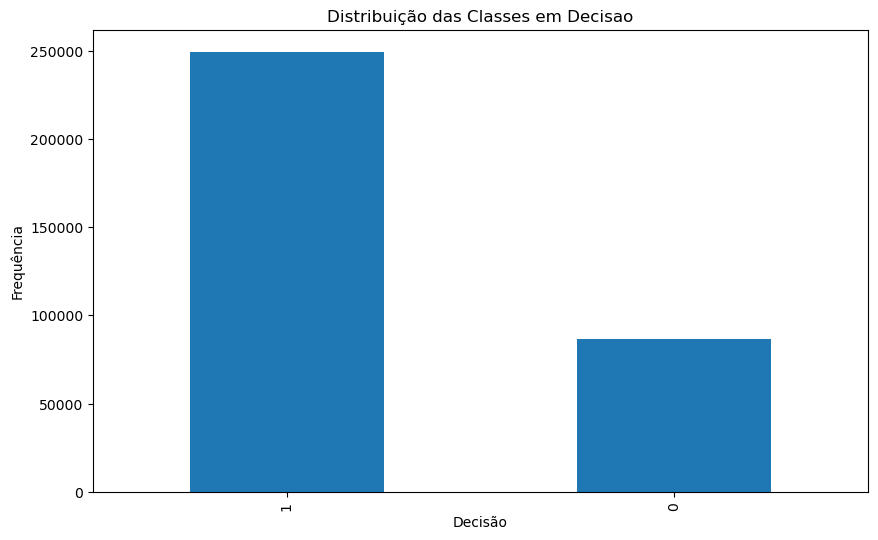

In [17]:
# Distribuição das classes em 'Decisao'
df_classifier['Decisao'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição das Classes em Decisao')
plt.xlabel('Decisão')
plt.ylabel('Frequência')
plt.show()

In [18]:
# Etapa 1: Reduzir o dataset pela metade mantendo a proporção original
df_reduced = df_classifier.sample(frac=0.4, random_state=42).reset_index(drop=True)

# Etapa 2: Balancear as classes no dataset reduzido
# Pegar o número de amostras da menor classe após a redução
n_samples_per_class = df_reduced['Decisao'].value_counts().min()

# Amostrar cada classe com um número igual de exemplos
df_balanced = df_reduced.groupby('Decisao', group_keys=False).apply(
    lambda x: x.sample(n=n_samples_per_class, random_state=42)
).reset_index(drop=True)

# Checar a nova distribuição de classes
print(df_balanced['Decisao'].value_counts())


Decisao
0    34482
1    34482
Name: count, dtype: int64


/tmp/ipykernel_1341947/1311174976.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_reduced.groupby('Decisao', group_keys=False).apply(


In [19]:
wandb.init(
    project="Pedidos_Respostas_LLM",  # Nome do mesmo projeto
    name="dataset_processado",  # Nome específico desta etapa
    notes="Dataset processado com mapeamento e pré-processamento textual"
)

# Salvar o arquivo processado
output_path = "dataset_processado.parquet"
df_classifier.to_parquet(output_path, index=False)

# Criar e registrar o artefato processado
artifact = wandb.Artifact(
    name="dataset_processado",
    type="dataset",
    description="Dataset pós-processamento, contendo mapeamento de decisão e colunas filtradas."
)
artifact.add_file(output_path)

# Logar o artefato no mesmo projeto
wandb.log_artifact(artifact)

# Finalizar o WandB
wandb.finish()


##Tokenização

In [20]:
# Importações
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from datasets import Dataset
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import io
import tempfile


In [21]:
# Retirar essa celula quando for realizar o treinamento de verdade
# Reduzir o dataset para um número menor de entradas
# df_classifier = df_classifier.sample(100, random_state=42).reset_index(drop=True)

In [ ]:
# Carregar o modelo e o tokenizer
model_name = "neuralmind/bert-base-portuguese-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Função para gerar e logar embeddings
def generate_and_log_embeddings(texts, model, tokenizer, batch_size=16, max_length=512):
    # Inicializar o projeto no WandB
    wandb.init(project="Pedidos_Respostas_LLM", name="embeddings_save")

    embeddings = []
    model.eval()

    with torch.no_grad():
        # Barra de progresso
        for i in tqdm(range(0, len(texts), batch_size), desc="Gerando embeddings"):
            batch = texts[i:i + batch_size]
            tokens = tokenizer(
                batch, padding=True, truncation=True, max_length=max_length, return_tensors="pt"
            )
            outputs = model(**tokens)
            # Usar as saídas do token [CLS] como embedding do texto
            batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu()
            embeddings.append(batch_embeddings)

    embeddings = torch.cat(embeddings, dim=0)

    # Salvar os embeddings em um arquivo temporário
    with tempfile.NamedTemporaryFile(suffix=".pt", delete=False) as temp_file:
        torch.save(embeddings, temp_file.name)

        # Criar e logar o artefato no WandB
        artifact = wandb.Artifact("text_embeddings", type="embeddings")
        artifact.add_file(temp_file.name, name="embeddings.pt")
        wandb.log_artifact(artifact)

    # Finalizar o WandB
    wandb.finish()

# Lista de textos
texts = df_balanced['texto_completo'].tolist()

# Gerar e logar os embeddings
generate_and_log_embeddings(texts, model, tokenizer)


Gerando embeddings:   0%|          | 0/4311 [00:00<?, ?it/s]

In [ ]:
# Carregar o modelo para classificação
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Inicializar o projeto no WandB
run = wandb.init(project="Pedidos_Respostas_LLM", name="load_embeddings")

# Baixar os embeddings do WandB
artifact = run.use_artifact("text_embeddings:latest")  # Certifique-se de que o nome e tipo estejam corretos
artifact_dir = artifact.download()

# Carregar os embeddings baixados
embeddings_path = f"{artifact_dir}/embeddings.pt"
embeddings = torch.load(embeddings_path)

# Carregar os rótulos
labels = df_classifier['Decisao'].tolist()

# Dividir os dados em treinamento e teste
train_embeddings, test_embeddings, train_labels, test_labels = train_test_split(
    embeddings, labels, test_size=0.2, stratify=labels, random_state=42
)

# Finalizar o WandB
run.finish()

## Preparando o bert

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Criar TensorDatasets
train_dataset = TensorDataset(train_embeddings, torch.tensor(train_labels))
test_dataset = TensorDataset(test_embeddings, torch.tensor(test_labels))

# Criar DataLoaders
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=16)

# Configurar o otimizador
optimizer = AdamW(model.parameters(), lr=5e-5)


In [ ]:
from torch.nn.functional import softmax
from sklearn.metrics import classification_report

# Configurar o scheduler
num_epochs = 20
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

# Configurar dispositivo
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Loop de treinamento e avaliação com barra de progresso
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    
    # Treinamento
    model.train()
    total_loss = 0
    
    # Adicionar a barra de progresso no loop de treinamento
    progress_bar = tqdm(train_dataloader, desc="Treinando", leave=False)
    for batch in progress_bar:
        optimizer.zero_grad()
        
        # Carregar embeddings e labels
        embeddings = batch[0].to(device).unsqueeze(1)  # Adiciona a dimensão de sequência
        labels = batch[1].to(device)

        # Passar embeddings diretamente ao modelo
        outputs = model(inputs_embeds=embeddings, labels=labels)
        loss = outputs.loss

        # Backpropagation
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        total_loss += loss.item()
        progress_bar.set_postfix({"Loss": loss.item()})  # Atualizar a barra com a perda

    print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {total_loss / len(train_dataloader)}")


In [ ]:
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for batch in test_dataloader:
        embeddings = batch[0].to(device).unsqueeze(1)  # Adicionar a dimensão de sequência
        labels = batch[1].to(device)

        outputs = model(inputs_embeds=embeddings)
        logits = outputs.logits
        predictions = torch.argmax(softmax(logits, dim=-1), dim=-1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predictions.cpu().numpy())

# Relatório detalhado
print(classification_report(true_labels, predicted_labels, target_names=["Classe 0", "Classe 1"]))


In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

# Definir o nome do repositório onde o modelo será salvo
repo_name = "Lorero/bert-treinado-pedidos"

# Garantir que o token do Hugging Face esteja carregado corretamente
hf_token = os.getenv("HF_TOKEN")
if hf_token is None:
    raise ValueError("Token do Hugging Face não encontrado. Certifique-se de configurá-lo corretamente.")

# Salvar o modelo localmente
output_dir = "./modelo_treinado"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Subir o modelo para o Hugging Face
from huggingface_hub import HfApi, HfFolder

# Autenticar e fazer upload
from huggingface_hub import Repository

print("Fazendo upload para o Hugging Face Hub...")
model.push_to_hub(repo_name, use_auth_token=hf_token)
tokenizer.push_to_hub(repo_name, use_auth_token=hf_token)

print(f"Modelo salvo com sucesso no repositório: https://huggingface.co/{repo_name}")